# Data Presentation

Run this notebook to make Figure 1.

The figures are outputted in the `./figures` folder

In [1]:
#!/usr/bin/env python
# coding: utf-8
# (c) Charles Le Losq, Clément Ferraina 2023
# see embedded licence file
# iVisc 1.0

#
# Library Loading
#
import pandas as pd # manipulate dataframes
import matplotlib.pyplot as plt # plotting
import numpy as np
import gpvisc

## Create Figure 1

In [2]:
# Count number of unique composition for each oxide in dataset_lp
our_lp = pd.read_excel("./additional_data/database.xlsx", sheet_name="lp")
our_lp['Name'] = gpvisc.generate_token(our_lp) # We add the unique names
dataset_lp = pd.read_csv("./additional_data/dataset+sciglass_lp.csv")
dataset_sciglass = dataset_lp.loc[dataset_lp.Sciglass!=False,:].copy().reset_index()

compo_lp = dataset_lp.loc[:, gpvisc.list_oxides()].copy()
compo_lp['feo'] = compo_lp['feo'] + 0.5*compo_lp['fe2o3']
compo_lp = compo_lp.drop('fe2o3', axis=1).copy().to_numpy()
compo_lp = compo_lp/np.sum(compo_lp, axis=1).reshape(-1,1)*100
compo_lp = np.round(compo_lp, decimals=1).copy()
compo_unique_lp = np.unique(compo_lp,axis=0)
lplist = np.count_nonzero(compo_unique_lp, axis=0)

print("ROOM PRESSURE DATASET\n")
print("Number of data points from our database: {}".format(len(our_lp)))
print("Number of SciGlass data points: {}".format(len(dataset_sciglass)))
print("Total number of data points at 1 atm: {}".format(len(dataset_lp)))
print("")

nb_compo_our = len(np.unique(our_lp.Name))
nb_compo_sciglass = len(np.unique(dataset_sciglass.Name))
print("Number of compositions from our database: {}".format(nb_compo_our))
print("Number of SciGlass compositions: {}".format(nb_compo_sciglass))
print("Total number of compositions at 1 atm: {}".format(nb_compo_our+nb_compo_sciglass))

ROOM PRESSURE DATASET

Number of data points from our database: 15440
Number of SciGlass data points: 12231
Total number of data points at 1 atm: 27671

Number of compositions from our database: 2155
Number of SciGlass compositions: 3591
Total number of compositions at 1 atm: 5746


In [3]:
# Count number of unique composition for each oxide in dataset_hp
dataset_hp = pd.read_csv("./additional_data/dataset_hp.csv")
compo_hp = dataset_hp.loc[:, gpvisc.list_oxides()].copy()
compo_hp['feo'] = compo_hp['feo'] + 0.5*compo_hp['fe2o3']
compo_hp = compo_hp.drop('fe2o3', axis=1).copy().to_numpy()
compo_hp = compo_hp/np.sum(compo_hp, axis=1).reshape(-1,1)*100
compo_hp = np.round(compo_hp, decimals=1).copy()
compo_unique_hp = np.unique(compo_hp,axis=0)
hplist = np.count_nonzero(compo_unique_hp, axis=0)

print("HIGH PRESSURE DATASET\n")
print("Number of data points: {}".format(len(dataset_hp)))
print("Number of compositions: {}".format(len(np.unique(dataset_hp.Name))))
print("")

print("TOTAL DATASET\n")
print("Number of data points: {}".format(len(dataset_hp)+len(dataset_lp)))
print("Number of compositions: {}".format(len(np.unique(pd.concat((dataset_hp.Name,dataset_lp.Name))))))
print("")

HIGH PRESSURE DATASET

Number of data points: 1227
Number of compositions: 243

TOTAL DATASET

Number of data points: 28898
Number of compositions: 5791



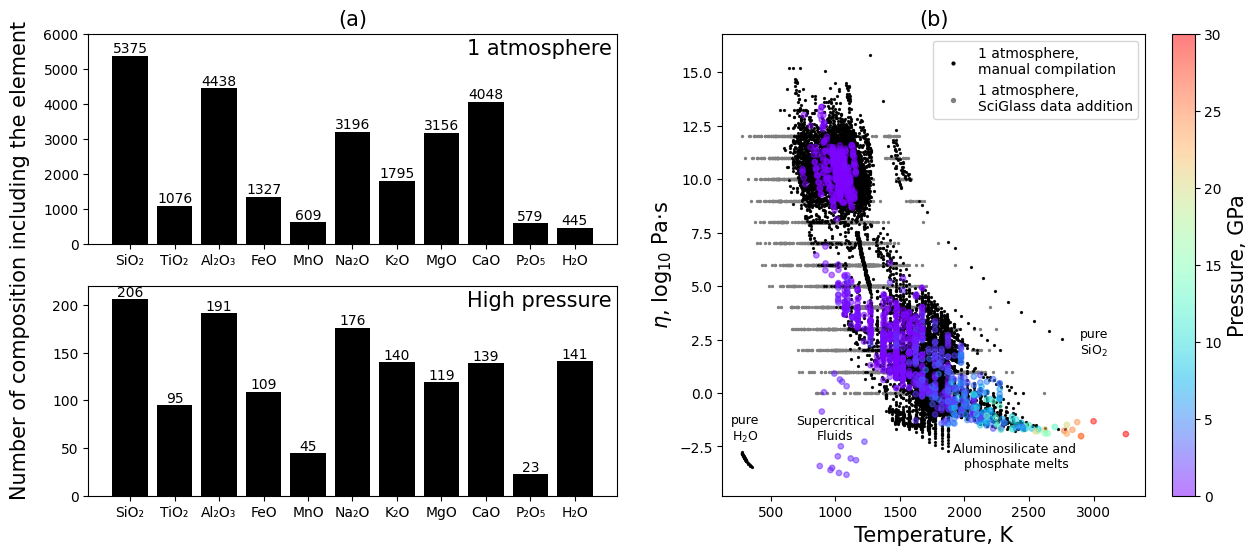

In [4]:
# Create function to add values to barplots
def add_value_label(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1]+100, y_list[i - 1], ha='center')
def add_value_label2(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1]+3, y_list[i - 1], ha='center')
class_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] #['sio2','tio2','al2o3','feo','mno','na2o','k2o','mgo','cao','p2o5','h2o'])

# Create figures
fig=plt.figure(figsize=(15,6))

# Barplot 1 database without P
ax1=plt.subplot(2,2,1)
ax1.bar(class_number, lplist,color='black')
add_value_label(class_number, lplist)
ax1.set_xticks(class_number, ['SiO\u2082','TiO\u2082','Al\u2082O\u2083','FeO','MnO','Na\u2082O','K\u2082O','MgO','CaO','P\u2082O\u2085','H\u2082O'])
ax1.set_ylim(0,6000)
ax1.annotate('1 atmosphere',(0.99,0.9), xycoords="axes fraction", size=15,ha='right')
ax1.set_title('(a)',size=15)

# Barplot 2 database with P
ax2=plt.subplot(2,2,3)
ax2.bar(class_number, hplist, color='black')
add_value_label2(class_number, hplist)
ax2.set_xticks(class_number, ['SiO\u2082','TiO\u2082','Al\u2082O\u2083','FeO','MnO','Na\u2082O','K\u2082O','MgO','CaO','P\u2082O\u2085','H\u2082O'])
ax2.set_ylim(0,220)
ax2.annotate('High pressure',(0.99,0.9), xycoords="axes fraction", size=15,ha='right')
ax2.text(-1.7,0,'Number of composition including the element',rotation='vertical',size=15)

# Diagram viscosity vs T, both databases
plt.subplot(1,2,2)
pl1 = plt.scatter(dataset_lp.loc[:,'T'],
            dataset_lp.loc[:,'viscosity'],color="grey",s=2)
pl2 = plt.scatter(our_lp.loc[:,'T'],
            our_lp.loc[:,'viscosity'],c='k',s=1)
plt.scatter(dataset_hp['T'],dataset_hp['viscosity'],cmap='rainbow',c=dataset_hp['P'],alpha=0.5,s=15)
plt.xlabel('Temperature, K',size=15)
plt.ylabel('$\eta$, log$_{10}$ Pa$\cdot$s',size=15)
cbar = plt.colorbar()
cbar.set_label('Pressure, GPa',size=15)
cbar.set_ticks([0,5,10,15,20,25,30], labels=['0','5','10','15','20','25','30'])
plt.legend([pl2,pl1],
           ['1 atmosphere, \nmanual compilation','1 atmosphere, \nSciGlass data addition'],
          markerscale=2)
plt.title('(b)',size=15)

plt.text(300,-2.2,'pure\nH$_2$O', ha='center', fontsize=9)
plt.text(3000,1.8,'pure\nSiO$_2$', ha='center', fontsize=9)
plt.text(2400,-3.5,'Aluminosilicate and \nphosphate melts', ha='center', fontsize=9)
plt.text(1000,-2.15,'Supercritical\nFluids', ha='center', fontsize=9)

plt.savefig('./figures/Figure1.pdf')

## Additional figures

Text(600, 0.5, 'Supercritical\nFluids')

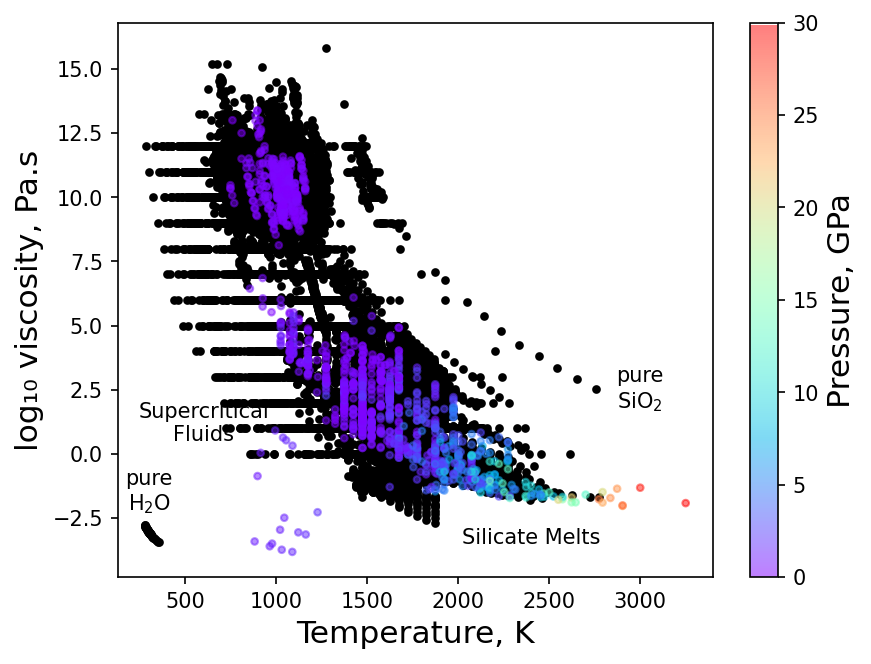

In [5]:
# Diagram viscosity vs T, both databases ONLY with descriptions
plt.figure(dpi=150)
plt.scatter(dataset_lp['T'],dataset_lp['viscosity'],c='k',s=10)
plt.scatter(dataset_hp['T'],dataset_hp['viscosity'],cmap='rainbow',c=dataset_hp['P'],alpha=0.5,s=10)
plt.xlabel('Temperature, K',size=15)
plt.ylabel('log\u2081\u2080 viscosity, Pa.s',size=15)
cbar = plt.colorbar()
cbar.set_label('Pressure, GPa',size=15)
cbar.set_ticks([0,5,10,15,20,25,30], labels=['0','5','10','15','20','25','30'])
plt.title('',size=15)

plt.text(300,-2.2,'pure\nH$_2$O', ha='center')
plt.text(3000,1.8,'pure\nSiO$_2$', ha='center')
plt.text(2400,-3.5,'Silicate Melts', ha='center')
plt.text(600,0.5,'Supercritical\nFluids', ha='center')

#plt.savefig('./figures/DatabaseTPH2O.pdf')

### 3D attempt

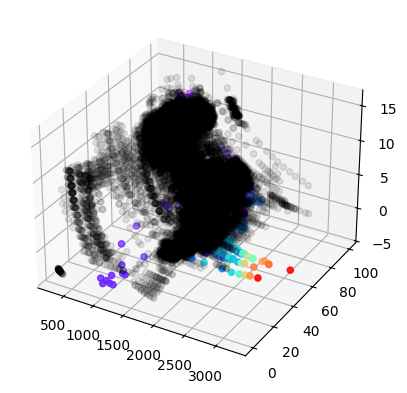

In [6]:
all_data = pd.concat((dataset_lp,dataset_hp)).reset_index().copy()

# Diagram viscosity vs T, both databases ONLY with descriptions
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

pl1 = ax.scatter(dataset_lp['T'], dataset_lp["sio2"]+dataset_lp["al2o3"], dataset_lp['viscosity'], c="k", zorder=0, alpha=0.1)
pl2 = ax.scatter(dataset_hp['T'], dataset_hp["sio2"]+dataset_hp["al2o3"], dataset_hp['viscosity'], c=dataset_hp['P'], cmap="rainbow", zorder=1000)


#plt.savefig('./figures/DatabaseTPH2O.pdf')